# FINAL NPZD PROTOTYPE

In [1]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

In [2]:
from phydra.components.variables import SV
from phydra.components.fluxes import (LinearForcingInput, LinearMortalityExchange,
                                      QuadraticMortality,
                                      ExponentialGrowth, MonodGrowth,
                                      HollingTypeIII, HollingTypeIII_ListResources,
                                      Growth_Monod_Eppley_Steele)
from phydra.components.forcings import ConstantForcing, SinusoidalForcing, GlobalSlabClimatologyForcing

In [3]:
from phydra.components.fluxes import MultiLimGrowth, Monod_ML, Steele_ML, Eppley_ML

In [4]:
import numpy as np

In [5]:
NPZD = phydra.create({'Nutrient':SV, 
                      'Phytoplankton':SV,
                      'Zooplankton':SV,
                      'Detritus':SV,

                      'Input':LinearForcingInput, 
                      'Mortality':LinearMortalityExchange, 'QuadMortality':QuadraticMortality,

                      'Growth':MultiLimGrowth,
                      'Monod':Monod_ML,
                      'Steele':Steele_ML,
                      'Eppley':Eppley_ML,
                      'Grazing':HollingTypeIII_ListResources,
                      
                      # HERE NEED TO ADD THIS:
                      'N0':GlobalSlabClimatologyForcing,
                      'Tmld':GlobalSlabClimatologyForcing,
                      'I0':GlobalSlabClimatologyForcing,
                      'MLD':GlobalSlabClimatologyForcing
                     })

In [6]:
NPZD

<xsimlab.Model (19 processes, 64 inputs)>
Core
    solver_type         [in]
Time
    time                [in] ('input_time',) sequence of time point...
Nutrient
    var_label           [in] label / basic state variable
    var_init            [in] initial value / basic state variable
Phytoplankton
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
Zooplankton
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
Detritus
    var_label           [in] label / basic state variable
    var_init            [in] initial value / basic state variable
N0
    rbb                 [in] constant value of forcing
    dataset             [in] Options: 'n0x', 'mld', 'tmld', 'par'
    forcing_label       [in] label / 
    lon                 [in] constant value of forcing
    lat                 [in] constant value of forcing
    k                   [in] The deg

'N0':{'lat':47,'lon':-20,'rbb':2,'smooth':5, 'k':2,
       'dataset':'n0x', 'show_plot':True},
'Temp':{'lat':47,'lon':-20,'rbb':2,'smooth':5, 'k':2,
       'dataset':'tmld', 'show_plot':True},
'I0':{'lat':47,'lon':-20,'rbb':2,'smooth':10, 'k':2,
       'dataset':'par', 'show_plot':True},
'MLD':{'lat':47,'lon':-20,'rbb':2,'smooth':400, 'k':2,
       'dataset':'mld', 'show_plot':True}

In [7]:
odeint_setup = phydra.setup('odeint', NPZD,
            time=np.arange(0,365*5),
            input_vars={
                'Nutrient':{'var_label':'N','var_init':3.},
                'Phytoplankton':{'var_label':'P','var_init':0.1},
                'Zooplankton':{'var_label':'Z','var_init':0.1},
                'Detritus':{'var_label':'D','var_init':0.1},
                
                'Input':{'var':'N','rate':0.1, 'forcing':'N0'},
                
                'Mortality':{'source':'P', 'sink':'D', 'rate':0.1},
                'QuadMortality':{'var':'Z', 'rate':0.01},
                
                'Growth':{'consumer':'P', 'resource':'N', 'mu_max':1.,},
                
                'Monod':{'resource':'N', 'halfsat':1.5},
                'Steele':{'pigment_biomass':'P','Light':'I0', 'MLD':'MLD',
                          'kw':0.04, 'kc':0.03, 'i_opt':2},
                'Eppley':{'Temp':'Tmld', 'eppley':0.063},
                
                'Grazing':{'resources':['P','D'], 'consumer':'Z',
                           'feed_prefs':[.5,.5],'Imax':1., 'kZ':1.5},
                
                'N0':{'forcing_label':'N0', 'dataset':'n0x',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':5, 'k':2},
                'Tmld':{'forcing_label':'Tmld', 'dataset':'tmld',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':5, 'k':2},
                'I0':{'forcing_label':'I0', 'dataset':'par',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':10, 'k':2},
                'MLD':{'forcing_label':'MLD', 'dataset':'mld',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':400, 'k':2},
            },
            output_vars="ALL"
            )

In [8]:
with NPZD:
    odeint_out = odeint_setup.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component N0
Initializing component I0
Initializing component MLD
Initializing component Tmld
Initializing component Input
Initializing component Mortality
Initializing component QuadMortality
Initializing component Monod
Initializing component Steele
Initializing component Eppley
Initializing component Grazing
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.ODEINTSolver object at 0x11a089ac0>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Z', 'D'] 
Parameters:['N0_dataset', 'N0_lat', 'N0_lon', 'N0_rbb', 'N0_smooth', 'N0_k', 'I0_dataset', 'I0_lat', 'I0_lon', 'I0_rbb', 'I0_smooth', 'I0_k', 'MLD_dataset', 'MLD_lat', 'MLD_lon', 'MLD_rbb', 'MLD_smooth', 'MLD_k', 'Tmld_dataset', 'Tmld_lat', 'Tmld_lon', 'Tmld_rbb', 'Tmld_smooth', 'Tmld_k', 'Inp

In [9]:
odeint_out

<xarray.Dataset>
Dimensions:                         (clock: 2, input_time: 1825, resources: 2, time: 1825)
Coordinates:
  * clock                           (clock) int64 0 1
Dimensions without coordinates: input_time, resources, time
Data variables:
    Core__solver_type               <U6 'odeint'
    Detritus__var_init              float64 0.1
    Detritus__var_label             <U1 'D'
    Detritus__var_value             (time) float64 0.1 0.1127 ... 0.1889 0.1892
    Eppley__Temp                    <U4 'Tmld'
    Eppley__eppley                  float64 0.063
    Eppley__eppley_growth_label     <U20 'Eppley_eppley_growth'
    Eppley__eppley_growth_value     (time) float64 2.32 2.318 ... 2.333 2.328
    Grazing__Imax                   float64 1.0
    Grazing__consumer               <U1 'Z'
    Grazing__feed_prefs             (resources) float64 0.5 0.5
    Grazing__grazing_value          (resources, time) float64 0.0002212 ... 0...
    Grazing__kZ                     float64 1.5
    Grazing__resources              (resources) <U1 'P' 'D'
    Growth__consumer                <U1 'P'
    Growth__growth_value            (time) float64 0.05931 0.07625 ... 0.3349
    Growth__mu_max                  float64 1.0
    Growth__resource                <U1 'N'
    I0__dataset                     <U3 'par'
    I0__forcing_label               <U2 'I0'
    I0__forcing_value               (time) float64 7.521 7.594 ... 7.388 7.452
    I0__k                           int64 2
    I0__lat                         int64 47
    I0__lon                         int64 -20
    I0__rbb                         int64 2
    I0__smooth                      int64 10
    Input__forcing                  <U2 'N0'
    Input__input_value              (time) float64 0.509 0.5111 ... 0.5025
    Input__rate                     float64 0.1
    Input__var                      <U1 'N'
    MLD__dataset                    <U3 'mld'
    MLD__forcing_label              <U3 'MLD'
    MLD__forcing_value              (time) float64 160.4 162.2 ... 156.8 158.6
    MLD__k                          int64 2
    MLD__lat                        int64 47
    MLD__lon                        int64 -20
    MLD__rbb                        int64 2
    MLD__smooth                     int64 400
    Monod__halfsat                  float64 1.5
    Monod__monod_lim_label          <U15 'Monod_monod_lim'
    Monod__monod_lim_value          (time) float64 0.6667 0.682 ... 0.9844
    Monod__resource                 <U1 'N'
    Mortality__death_value          (time) float64 0.01 0.0129 ... 0.04707
    Mortality__rate                 float64 0.1
    Mortality__sink                 <U1 'D'
    Mortality__source               <U1 'P'
    N0__dataset                     <U3 'n0x'
    N0__forcing_label               <U2 'N0'
    N0__forcing_value               (time) float64 5.09 5.133 ... 5.003 5.047
    N0__k                           int64 2
    N0__lat                         int64 47
    N0__lon                         int64 -20
    N0__rbb                         int64 2
    N0__smooth                      int64 5
    Nutrient__var_init              float64 3.0
    Nutrient__var_label             <U1 'N'
    Nutrient__var_value             (time) float64 3.0 3.435 ... 94.88 95.04
    Phytoplankton__var_init         float64 0.1
    Phytoplankton__var_label        <U1 'P'
    Phytoplankton__var_value        (time) float64 0.1 0.163 ... 0.472 0.4695
    QuadMortality__death_value      (time) float64 0.0001 0.0001005 ... 0.3886
    QuadMortality__rate             float64 0.01
    QuadMortality__var              <U1 'Z'
    Steele__Light                   <U2 'I0'
    Steele__MLD                     <U3 'MLD'
    Steele__i_opt                   int64 2
    Steele__kc                      float64 0.03
    Steele__kw                      float64 0.04
    Steele__pigment_biomass         <U1 'P'
    Steele__steele_light_lim_label  <U23 'Steele_steele_light_lim'
    Steele__steele_light_lim_value  (time) f

In [10]:
import matplotlib.pyplot as plt

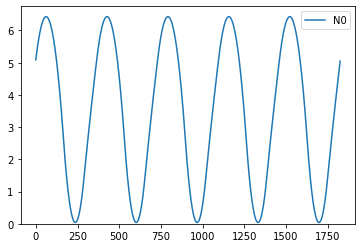

In [11]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.N0__forcing_value, label='N0')
plt.ylim(bottom=0)
plt.legend()

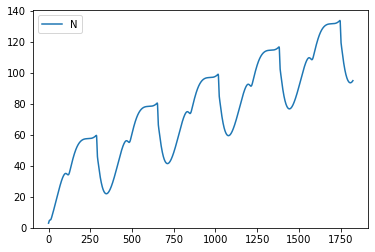

In [12]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.Nutrient__var_value, label='N')
plt.ylim(bottom=0)
plt.legend()

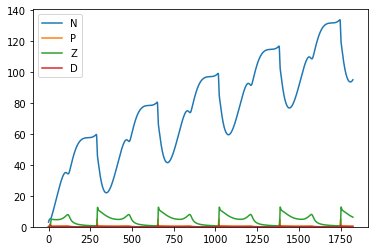

In [13]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.Nutrient__var_value, label='N')
plt.plot(time, odeint_out.Phytoplankton__var_value, label='P')
plt.plot(time, odeint_out.Zooplankton__var_value, label='Z')
plt.plot(time, odeint_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

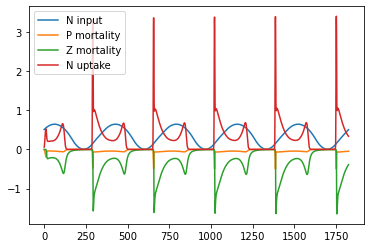

In [14]:
plt.plot(time, odeint_out.Input__input_value, label='N input')
plt.plot(time, -odeint_out.Mortality__death_value, label='P mortality')
plt.plot(time, -odeint_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, odeint_out.Growth__growth_value, label='N uptake')
#plt.plot(time, odeint_out.Grazing__grazing_value, label='Grazing')
#plt.ylim(bottom=0)
plt.legend()

In [15]:
stepwise_setup = phydra.update_setup(model=NPZD, old_setup=odeint_setup, new_solver="stepwise",
                                     new_time=np.arange(0,365*5,.5))

In [16]:
with NPZD:
    stepwise_out = stepwise_setup.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component N0
Initializing component I0
Initializing component MLD
Initializing component Tmld
Initializing component Input
Initializing component Mortality
Initializing component QuadMortality
Initializing component Monod
Initializing component Steele
Initializing component Eppley
Initializing component Grazing
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.StepwiseSolver object at 0x16a62f6a0>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Z', 'D'] 
Parameters:['N0_dataset', 'N0_lat', 'N0_lon', 'N0_rbb', 'N0_smooth', 'N0_k', 'I0_dataset', 'I0_lat', 'I0_lon', 'I0_rbb', 'I0_smooth', 'I0_k', 'MLD_dataset', 'MLD_lat', 'MLD_lon', 'MLD_rbb', 'MLD_smooth', 'MLD_k', 'Tmld_dataset', 'Tmld_lat', 'Tmld_lon', 'Tmld_rbb', 'Tmld_smooth', 'Tmld_k', 'I

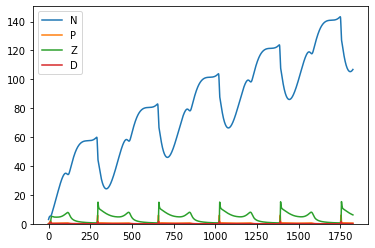

In [17]:
time = stepwise_out.Time__time
plt.plot(time, stepwise_out.Nutrient__var_value, label='N')
plt.plot(time, stepwise_out.Phytoplankton__var_value, label='P')
plt.plot(time, stepwise_out.Zooplankton__var_value, label='Z')
plt.plot(time, stepwise_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

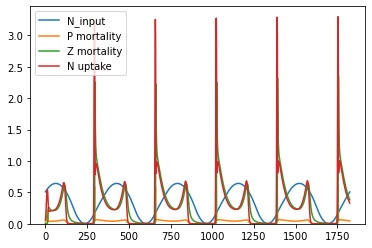

In [18]:
plt.plot(time, stepwise_out.Input__input_value, label='N_input')
plt.plot(time, stepwise_out.Mortality__death_value, label='P mortality')
plt.plot(time, stepwise_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, stepwise_out.Growth__growth_value, label='N uptake')
#plt.plot(time, stepwise_out.Grazing__grazing_value, label='Grazing')
plt.ylim(bottom=0)
plt.legend()

In [19]:
gekko_setup = phydra.update_setup(model=NPZD, 
                                  old_setup=odeint_setup, 
                                  new_solver="gekko", 
                                  # gekko solver works better (much faster) with smaller time steps:
                                  # new_time=np.arange(0,201,.1)
                                 )

In [20]:
with NPZD:
    gekko_out = gekko_setup.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component N0
Initializing component I0
Initializing component MLD
Initializing component Tmld
Initializing component Input
Initializing component Mortality
Initializing component QuadMortality
Initializing component Monod
Initializing component Steele
Initializing component Eppley
Initializing component Grazing
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.GEKKOSolver object at 0x16a87f430>
Model dicts are assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Z', 'D'] 
Parameters:['N0_dataset', 'N0_lat', 'N0_lon', 'N0_rbb', 'N0_smooth', 'N0_k', 'I0_dataset', 'I0_lat', 'I0_lon', 'I0_rbb', 'I0_smooth', 'I0_k', 'MLD_dataset', 'MLD_lat', 'MLD_lon', 'MLD_rbb', 'MLD_smooth', 'MLD_k', 'Tmld_dataset', 'Tmld_lat', 'Tmld_lon', 'Tmld_rbb', 'Tmld_smooth', 'Tmld_k'

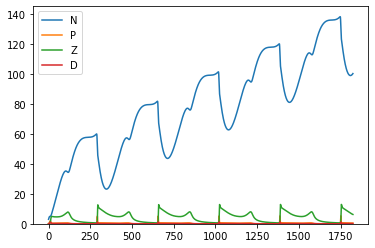

In [21]:
time = gekko_out.Time__time
plt.plot(time, gekko_out.Nutrient__var_value, label='N')
plt.plot(time, gekko_out.Phytoplankton__var_value, label='P')
plt.plot(time, gekko_out.Zooplankton__var_value, label='Z')
plt.plot(time, gekko_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

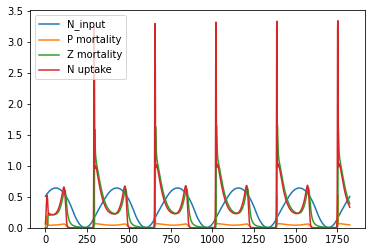

In [22]:
plt.plot(time, gekko_out.Input__input_value, label='N_input')
plt.plot(time, gekko_out.Mortality__death_value, label='P mortality')
plt.plot(time, gekko_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, gekko_out.Growth__growth_value, label='N uptake')
#plt.plot(time, gekko_out.Grazing__grazing_value, label='Grazing')
plt.ylim(bottom=0)
plt.legend()